In [1]:
!pip install keras

In [2]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [5]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1['DIAGN'] = data1['DIAGN'].replace({2: 1})
data1['DIAGN'] = data1['DIAGN'].replace({3: 1})
data1['DIAGN'] = data1['DIAGN'].replace({4: 1})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    303
1    168
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
567,Case 248,2,20230418104244.jpg,PruebasCITOBOT_Anon/Case 248/,0
568,Case 249,2,20230418103711.jpg,PruebasCITOBOT_Anon/Case 249/,1
569,Case 249,2,20230418103638.jpg,PruebasCITOBOT_Anon/Case 249/,1
570,Case 250,2,20230418093117.jpg,PruebasCITOBOT_Anon/Case 250/,0


In [6]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({2: 1})
data2['DIAGN'] = data2['DIAGN'].replace({3: 1})
print(data2['DIAGN'].value_counts())
data2

1    597
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,1
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,1
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,1


In [7]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
dataC1 = data3[data3['DIAGN'] == 0]
dataC2 = data3[data3['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=531)
data_aleatoria2 = dataC2.sample(n=58)
data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1     58
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
73595,P844053,6,I433757_C1.jpg,training_SEG/NHS/,0
55346,P509529,3,I396329_C1.jpg,training_SEG/NHS/,0
75241,P870842,4,I190934_C1.jpg,training_SEG/NHS/,0
37858,P194605,6,I332245_C1.jpg,training_SEG/NHS/,0
56512,P532220,6,I137077_C1.jpg,training_SEG/NHS/,0
...,...,...,...,...,...
46,P190364,2,I210060.jpg,training_SEG/Biopsy_Study/,1
278,P601598,2,I849358.jpg,training_SEG/Biopsy_Study/,1
143,P359120,4,I879781.jpg,training_SEG/Biopsy_Study/,1
360,P742384,2,I501577.jpg,training_SEG/Biopsy_Study/,1


In [8]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC1 = data4[data4['DIAGN'] == 0]
dataC2 = data4[data4['DIAGN'] == 1]
data_aleatoria = dataC1.sample(n=244)
data_aleatoria2 = dataC2.sample(n=244)
data4 = pd.concat([data_aleatoria, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

0    244
1    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
19,0,0,1079.jpg,Kaggle_SEG/Type_1/,0
200,0,0,751.jpg,Kaggle_SEG/Type_1/,0
123,0,0,356.jpg,Kaggle_SEG/Type_1/,0
130,0,0,41.jpg,Kaggle_SEG/Type_1/,0
90,0,0,181.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
719,0,0,46.jpg,Kaggle_SEG/Type_2/,1
489,0,0,1391.jpg,Kaggle_SEG/Type_2/,1
919,0,0,829.jpg,Kaggle_SEG/Type_2/,1
923,0,0,838.jpg,Kaggle_SEG/Type_2/,1


In [9]:
data = pd.concat([data1, data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_Anon/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_Anon/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_Anon/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_Anon/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_Anon/Case 003/,0
...,...,...,...,...,...
719,0,0,46.jpg,Kaggle_SEG/Type_2/,1
489,0,0,1391.jpg,Kaggle_SEG/Type_2/,1
919,0,0,829.jpg,Kaggle_SEG/Type_2/,1
923,0,0,838.jpg,Kaggle_SEG/Type_2/,1


In [10]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    1202
1    1067
Name: DIAGN, dtype: int64


In [11]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [12]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  return img

In [13]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
)

In [14]:
#Modelo UNET
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization, concatenate, Lambda, Input, Conv2D, MaxPooling2D, Conv2DTranspose

def modelCompile():
  # Definimos la entrada al modelo
  Image_input = Input((224, 224, 1))
  Image_in = Image_input

  #contracting path
  conv1 = Conv2D(64, (3, 3), padding='same')(Image_in)
  conv1 = BatchNormalization()(conv1)
  conv1 = Activation('relu')(conv1)
  conv1 = Dropout(0.1)(conv1)

  conv1 = Conv2D(64, (3, 3), padding='same')(conv1)
  conv1 = BatchNormalization()(conv1)
  conv1 = Activation('relu')(conv1)
  maxp1 = MaxPooling2D((2, 2))(conv1)

  conv2 = Conv2D(128, (3, 3), padding='same')(maxp1)
  conv2 = BatchNormalization()(conv2)
  conv2 = Activation('relu')(conv2)
  conv2 = Dropout(0.1)(conv2)

  conv2 = Conv2D(128, (3, 3), padding='same')(conv2)
  conv2 = BatchNormalization()(conv2)
  conv2 = Activation('relu')(conv2)
  maxp2 = MaxPooling2D((2, 2))(conv2)

  conv3 = Conv2D(256, (3, 3), padding='same')(maxp2)
  conv3 = BatchNormalization()(conv3)
  conv3 = Activation('relu')(conv3)
  conv3 = Dropout(0.2)(conv3)

  conv3 = Conv2D(256, (3, 3), padding='same')(conv3)
  conv3 = BatchNormalization()(conv3)
  conv3 = Activation('relu')(conv3)
  maxp3 = MaxPooling2D((2, 2))(conv3)

  conv4 = Conv2D(512, (3, 3), padding='same')(maxp3)
  conv4 = BatchNormalization()(conv4)
  conv4 = Activation('relu')(conv4)
  conv4 = Dropout(0.2)(conv4)

  conv4 = Conv2D(512, (3, 3), padding='same')(conv4)
  conv4 = BatchNormalization()(conv4)
  conv4 = Activation('relu')(conv4)
  maxp4 = MaxPooling2D(pool_size=(2, 2))(conv4)

  conv5 = Conv2D(1024, (3, 3), padding='same')(maxp4)
  conv5 = BatchNormalization()(conv5)
  conv5 = Activation('relu')(conv5)
  conv5 = Dropout(0.3)(conv5)

  conv5 = Conv2D(1024, (3, 3), padding='same')(conv5)
  conv5 = BatchNormalization()(conv5)
  conv5 = Activation('relu')(conv5)

  #expansive path
  up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
  up6 = concatenate([up6, conv4])
  conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
  conv6 = BatchNormalization()(conv6)
  conv6 = Dropout(0.2)(conv6)
  conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)
  conv6 = BatchNormalization()(conv6)

  up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
  up7 = concatenate([up7, conv3])
  conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
  conv7 = BatchNormalization()(conv7)
  conv7 = Dropout(0.2)(conv7)
  conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)
  conv7 = BatchNormalization()(conv7)

  up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
  up8 = concatenate([up8, conv2])
  conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
  conv8 = BatchNormalization()(conv8)
  conv8 = Dropout(0.1)(conv8)
  conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)
  conv8 = BatchNormalization()(conv8)

  up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
  up9 = concatenate([up9, conv1])
  conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
  conv9 = BatchNormalization()(conv9)
  conv9 = Dropout(0.1)(conv9)
  conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)
  conv9 = BatchNormalization()(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model = Model(inputs=[Image_input], outputs=[outputs])
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  return model

model = modelCompile()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 224, 224, 64)         0         ['batch_normalization[0][0

Iteracion:  1
Epoch 1/150
46/46 [==============================] - 53s 663ms/step - loss: 3.9749 - accuracy: 0.6006 - val_loss: 2.2275 - val_accuracy: 0.5510
Epoch 2/150
46/46 [==============================] - 23s 505ms/step - loss: 3.1924 - accuracy: 0.6322 - val_loss: 4.9709 - val_accuracy: 0.5510
Epoch 3/150
46/46 [==============================] - 23s 507ms/step - loss: 3.4448 - accuracy: 0.6364 - val_loss: 10.8591 - val_accuracy: 0.5510
Epoch 4/150
46/46 [==============================] - 23s 508ms/step - loss: 4.4778 - accuracy: 0.6143 - val_loss: 5.8251 - val_accuracy: 0.5510
Epoch 5/150
46/46 [==============================] - 23s 506ms/step - loss: 4.1299 - accuracy: 0.5937 - val_loss: 12.9026 - val_accuracy: 0.5510
Epoch 6/150
46/46 [==============================] - 23s 505ms/step - loss: 4.5537 - accuracy: 0.6150 - val_loss: 17.1000 - val_accuracy: 0.5510
Epoch 7/150
46/46 [==============================] - 23s 505ms/step - loss: 4.1352 - accuracy: 0.6219 - val_loss: 10.29

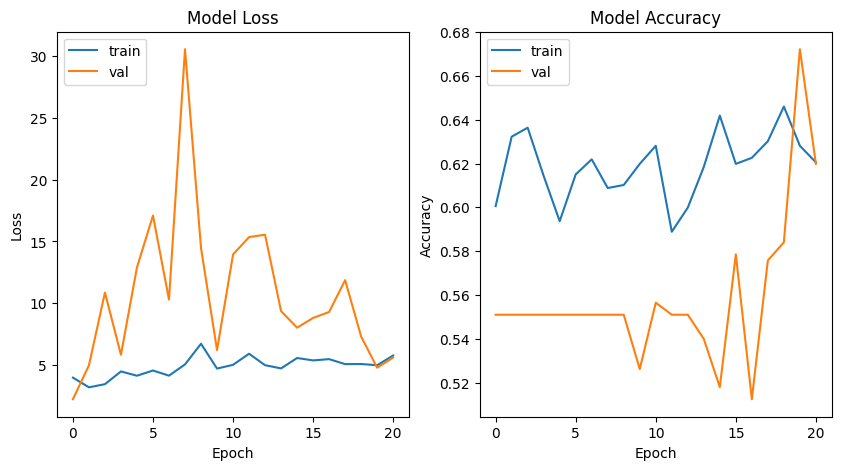

15/15 [==============================] - 10s 624ms/step
[[244   0]
 [210   0]]
Specificity:  1.0
Sensitivity:  0.0
Accuracy:  0.5374449339207048
Precision:  [0.53744493 0.        ]
Recall:     [1. 0.]
F1score:    [0.6991404 0.       ]
Iteracion:  2
Epoch 1/150
46/46 [==============================] - 34s 524ms/step - loss: 4.3300 - accuracy: 0.5985 - val_loss: 4.0447 - val_accuracy: 0.5069
Epoch 2/150
29/46 [=================>............] - ETA: 7s - loss: 3.6802 - accuracy: 0.5991

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  #Conjutnos de Train, Validation y Test
  x_trainPath, x_testPath, y_trainPath, y_testPath = train_test_split(data, data['DIAGN'], test_size=0.2)
  x_trainPath, x_valPath, y_trainPath, y_valPath = train_test_split(x_trainPath, y_trainPath, test_size=0.2)

  y_trainPath = np.array(y_trainPath)
  y_testPath = np.array(y_testPath)
  y_valPath = np.array(y_valPath)

  #Cargar los path de las imagenes para el pipeline
  dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
  path_train = dataPathDrive + x_trainPath["PATH"] + x_trainPath['IMAGE_ID']
  path_test = dataPathDrive + x_testPath["PATH"] + x_testPath['IMAGE_ID']
  path_val = dataPathDrive + x_valPath["PATH"] + x_valPath['IMAGE_ID']

  path_train = np.array(path_train)
  path_test = np.array(path_test)
  path_val = np.array(path_val)

  #Convertir en tensores
  data_train = tf.data.Dataset.from_tensor_slices(path_train)
  data_test = tf.data.Dataset.from_tensor_slices(path_test)
  data_val = tf.data.Dataset.from_tensor_slices(path_val)

  #Procesar y Cargar Imagenes
  data_train = data_train.map(process_image)
  data_test = data_test.map(process_image)
  data_val = data_val.map(process_image)

  train = tf.data.Dataset.from_tensor_slices(to_categorical(y_trainPath, 2))
  train = tf.data.Dataset.zip((data_train,train))

  test = tf.data.Dataset.from_tensor_slices(to_categorical(y_testPath, 2))
  test = tf.data.Dataset.zip((data_test,test))

  val = tf.data.Dataset.from_tensor_slices(to_categorical(y_valPath, 2))
  val = tf.data.Dataset.zip((data_val,val))

  AS = train.batch(batch_size=32)
  AST = test.batch(batch_size=32)
  ASV = val.batch(batch_size=32)

  #Aplicar aumento de datos
  x_train = np.array(list(data_train.as_numpy_iterator()))
  y_train = np.array(list(train.as_numpy_iterator()), dtype=object)
  y_train = np.array([y[1] for y in y_train])

  x_val = np.array(list(data_val.as_numpy_iterator()))
  y_val = np.array(list(val.as_numpy_iterator()), dtype=object)
  y_val = np.array([y[1] for y in y_val])

  data_gen_train = datagen.flow(x_train, y_train, batch_size=32)
  data_gen_val = datagen.flow(x_val, y_val, batch_size=32)

  #Cargar Modelo
  model = modelCompile()

  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=20,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(data_gen_train, epochs=150, verbose=1, validation_data= data_gen_val, callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(AST)
  pred = model.predict(AST)

  y_testPath = list(y_testPath)
  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_testPath, pred_label)

  tn, fp, fn, tp = mat.ravel()

  specificity = tn / (tn + fp)

  sensitivity = tp / (tp + fn)

  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_testPath,pred_label))
  precVec.append(precision_score(y_testPath,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_testPath,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_testPath,pred_label,average=None,zero_division=0))

  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_testPath,pred_label))
  print("Precision: ",precision_score(y_testPath,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_testPath,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_testPath,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec)," | ","Sensitivity: ",np.mean(sensVec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec)," | ","Sensitivity: ",np.std(sensVec))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

In [ ]:
#import tensorflow as tf

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

#with open("model.tflite", 'wb') as f:
#  f.write(tflite_model)